In [189]:
suppressMessages(library(statsr))
suppressMessages(library(dplyr))
library(ggplot2)
suppressMessages(library(tidyr))

In [ ]:
load("../data/gss")

In [152]:
dim(gss)

[1] 57061   114

### Data

The general social survey (GSS) is a survey conducted every (other?) year to capture trends and change in American society. The survey is a random sample conducted on househoulds across the country. Households are contacted, where an adult over 18, will provide answers to the survey questions in person in Chicago, guaranteeing generalizability to the rest of the country's population.

Source:

Smith, Tom W., Davern, Michael, Freese, Jeremy, and Morgan, Stephen, General Social Surveys, 1972-2018 [machine-readable data file] Principal Investigator, Smith, Tom W.; Co-Principal Investigators, Michael Davern, Jeremy Freese, and Stephen Morgan; Sponsored by National Science Foundation. --NORC ed.-- Chicago: NORC, 2018: NORC at the University of Chicago [producer and distributor]. Data accessed from the GSS Data Explorer website at gssdataexplorer.norc.org.

### Research Question

Is there a significant difference between the proportion of individuals who responded "Too Much" in 1973, to those in 2012, on the GSS survey topic: "We are faced with many problems in this country, none of which can be solved easily or inexpensively. I'm going to name some of these problems, and for each one I'd like you to tell me whether you think we're spending too much money on it, too little money, or about the right amount. J. Foreign Aid."

I'm interested in this question because of the amount of debt the federal government has accumulated over the past 20 years. This website -> https://explorer.usaid.gov/aid-trends.html hosted by the the US government, shows trends in how much we've spent since 1946. Since 2003 we have spent much more money that the prior 20 years. A secondary general question is, has our perception of how much we spend on foreign aid trend with actual dollars spent?

### Exploratory Data Analysis

In [153]:
df <- (
    gss %>% 
    select(year, nataid) %>% 
    drop_na()
)

In [154]:
data_for_gg <- (
    subset(df, subset = year %in% c(1973, 2012)) %>% 
    group_by(year, nataid)
)

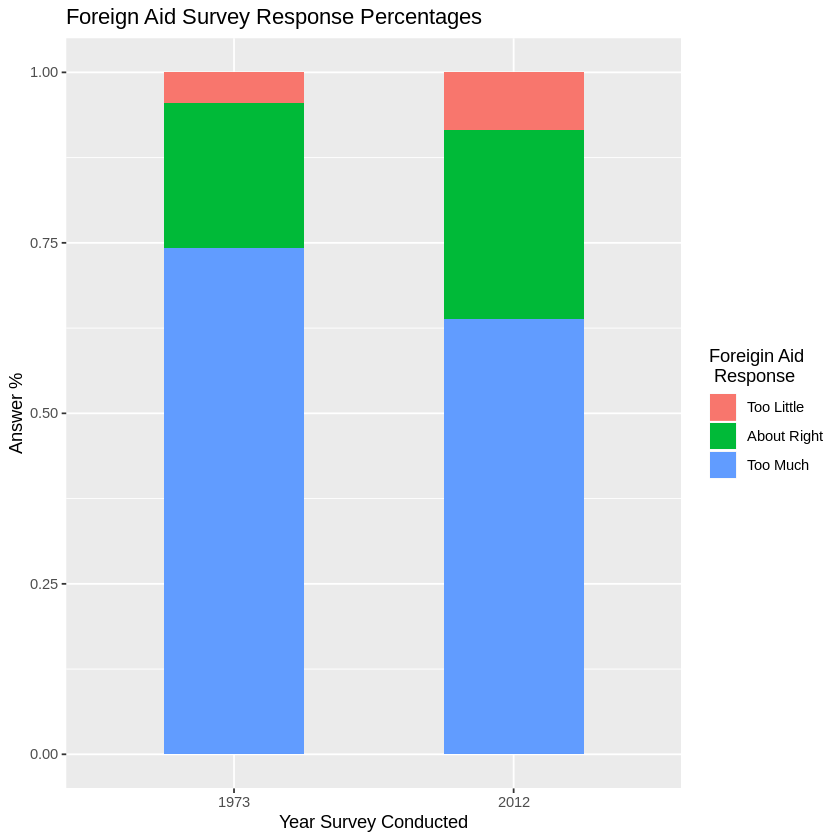

In [155]:
ggplot(data_for_gg, aes(x=as.character(year), fill=nataid))+ 
geom_bar(position="fill", width =.5) +
labs(title="Foreign Aid Survey Response Percentages",
        x ="Year Survey Conducted", y = "Answer %") + 
scale_fill_discrete(name = "Foreigin Aid \n Response")

We can infer from this graph that the proportion of people who say we spend "too much" on foreign aid is less in 2012  than in 1973

In [156]:
prep_data <- (
    data_for_gg %>% 
    tally() %>% 
    transform(year = as.character(year)) %>%
    spread(year, n)
)

In [176]:
get_sums<-data.frame('total', sum(prep_data$'1973'), sum(prep_data$'2012'))
names(get_sums)<-c("nataid",1973, 2012)
binding <- rbind(prep_data, get_sums)
intermediate <- t(binding[-1]) %>% as.data.frame()
names(intermediate) <- c('too_little', 'about_right', 'too_much', 'total')
intermediate

,too_little,about_right,too_much,total
,<int>,<int>,<int>,<int>
1973,63,302,1056,1421
2012,79,257,594,930


In [188]:
prop_much <- (intermediate$too_much/intermediate$total) %>% as.data.frame()
prop_right <- (intermediate$about_right/intermediate$total) %>% as.data.frame()
prop_little <- (intermediate$too_little/intermediate$total) %>% as.data.frame()
names(prop_much) <- c('prop_much')
names(prop_right) <- c('prop_right')
names(prop_little) <- c('prop_little')
semi_f_df <- cbind(intermediate, prop_much, prop_right, prop_little)

### Summary Stats for Table

In [170]:
semi_f_df

,too_little,about_right,too_much,total,prop_much,prop_right,prop_little
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1973,63,302,1056,1421,0.7431386,0.2125264,0.04433498
2012,79,257,594,930,0.6387097,0.2763441,0.08494624


These data reflect the graph output in figure one

### Inference

In [172]:
working_df <- semi_f_df %>% select(too_much, total, prop_much)
working_df

,too_much,total,prop_much
,<int>,<int>,<dbl>
1973,1056,1421,0.7431386
2012,594,930,0.6387097


#### Hypothesis

The null hypothesis for this experiment is that there is no difference in the proportions between those who answered "Too Much" in 1973 and 2012.

Ho: p1 = p2

Ha: p1 ≠ p2

#### Test Conditions

Two Conditons: Independence and Sample Size

Independence: Each group, 1973 and 2012 respondents, are independent groups and random samples because they were sampled from the population

Sample Sizes: Each sample size is less than 10% of the population so this condition is also met.


#### Method to be Used

This research question will testing the difference between two proportions

#### Results

In [175]:
prop.test(x=c(1056, 594), n=c(1421, 930), p = NULL, alternative = "two.sided",
          correct = TRUE)


	2-sample test for equality of proportions with continuity correction

data:  c(1056, 594) out of c(1421, 930)
X-squared = 28.796, df = 1, p-value = 8.04e-08
alternative hypothesis: two.sided
95 percent confidence interval:
 0.0652093 0.1436486
sample estimates:
   prop 1    prop 2 
0.7431386 0.6387097 


### Conlusion

According to the results, we are 95% confident that the proportion difference falls between the confidence interval of 0.0652093 and 0.1436486. With 0 falling outside of the confidence interval, the null hypothesis is rejected and the alternative is accepted, meaning there is significant evidence that the number of people who responded "too much" to the foreign aid research question is less in 2012 than in 1973.

Per the secondary question posed earlier, we are spending more money on foreign aid but less people think we're spending too much.